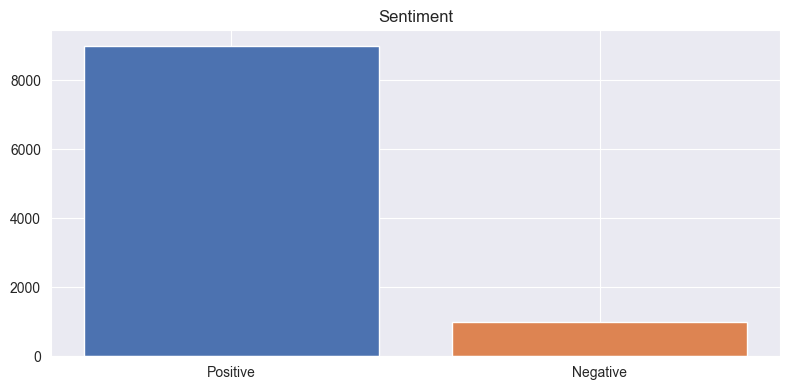

sentiment
positive    9000
negative    1000
Name: count, dtype: int64
sentiment
negative    1000
positive    1000
Name: count, dtype: int64
['positive']
['positive']
['negative']
0.8409090909090909
0.6515151515151515
0.8303030303030303
              precision    recall  f1-score   support

    positive       0.83      0.87      0.85       335
    negative       0.85      0.82      0.83       325

    accuracy                           0.84       660
   macro avg       0.84      0.84      0.84       660
weighted avg       0.84      0.84      0.84       660



In [20]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
df_review = pd.read_csv("C:\\Users\\aksha\\Downloads\\IMDB Dataset.csv.zip")
df_review
df_positive = df_review[df_review['sentiment']=='positive'][:9000]
df_negative = df_review[df_review['sentiment']=='negative'][:1000]

df_review_imb = pd.concat([df_positive,df_negative ])
colors = sns.color_palette('deep')

plt.figure(figsize=(8,4), tight_layout=True)
plt.bar(x=['Positive', 'Negative'],
        height=df_review_imb.value_counts(['sentiment']),
        color=colors[:2])
plt.title('Sentiment')
plt.savefig('sentiment.png')
plt.show()
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state= 0)
df_review_bal,df_review_bal['sentiment']=rus.fit_resample(df_review_imb[['review']],df_review_imb['sentiment'])

df_review_bal
print(df_review_imb.value_counts('sentiment'))
print(df_review_bal.value_counts('sentiment'))
from sklearn.model_selection import train_test_split

train,test = train_test_split(df_review_bal,test_size =0.33,random_state=42)
train_x, train_y = train['review'], train['sentiment']
test_x, test_y = test['review'], test['sentiment']
train_y.value_counts()
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
train_x_vector = tfidf.fit_transform(train_x)
# also fit the test_x_vector
test_x_vector = tfidf.transform(test_x)
pd.DataFrame.sparse.from_spmatrix(train_x_vector,
                                  index=train_x.index,
                                  columns=tfidf.get_feature_names_out())
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(train_x_vector, train_y)
print(svc.predict(tfidf.transform(['A good movie'])))
print(svc.predict(tfidf.transform(['An excellent movie'])))
print(svc.predict(tfidf.transform(['I did not like this movie at all I gave this movie away'])))
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier()
dec_tree.fit(train_x_vector, train_y)
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_x_vector.toarray(), train_y)

log_reg = LogisticRegression()
log_reg.fit(train_x_vector,train_y)
print(svc.score(test_x_vector, test_y))
print(dec_tree.score(test_x_vector, test_y))
print(log_reg.score(test_x_vector, test_y))
from sklearn.metrics import f1_score

f1_score(test_y,svc.predict(test_x_vector),
          labels = ['positive','negative'],average=None)
from sklearn.metrics import classification_report

print(classification_report(test_y,
                            svc.predict(test_x_vector),
                            labels = ['positive','negative']))
